# **Install**

In [2]:
!pip install numpy==1.26.0
!pip install pandas==2.2.1
!pip install seaborn==0.13.2
!pip install matplotlib==3.8.3
!pip install scikit-learn==1.4.1.post1

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/61.1 kB ? eta -:--:--
     ------------ ------------------------- 20.5/61.1 kB 640.0 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/61.1 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 61.1/61.1 kB 466.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.5 MB 3.4 MB/s eta 0:00:05
    --------------------------------------- 0.2/15.5 MB 3.0 MB/s eta 0:00:06
    --------------------------------------- 0.4/15.5 MB 2.8 MB/s eta 0:00:06
   - -------------------------------------- 0.5/15.5 MB 3.3 MB/s eta 0:00:05
   - -------------------------------------- 0.7/15.5 MB 3.4 MB/s eta 0:00:05
   -- ------------------------------------- 0.9/15.5 MB 3.6 MB/s eta 0:00:05
   -- ------------------------------------- 1.1/15.5 MB 3.8 MB/s eta 0:00:04
 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB 2.0 MB/s eta 0:00:06
   ---------------------------------------- 0.1/11.5 MB 1.7 MB/s eta 0:00:07
    --------------------------------------- 0.2/11.5 MB 2.0 MB/s eta 0:00:06
   - -------------------------------------- 0.3/11.5 MB 1.9 MB/s eta 0:00:06
   - -------------------------------------- 0.5/11.5 MB 2.4 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/11.5 MB 2.4 MB/s eta 0:00:05
   -- ------------------------------------- 0.9/11.5 MB 2.9 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/11.5 MB 2.7 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.5 MB 3.2 MB/s eta 0:00:04
   ----- ---------------------------------- 1.5/11.5 MB 3.4 MB/s eta 0:00:03
   ------ --------------------------------- 1.7/11.5 MB 3.6 MB/s eta 0:00:03
   --

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.6 MB 145.2 kB/s eta 0:00:53
   ---------------------------------------- 0.1/7.6 MB 217.9 kB/s eta 0:00:35
   ---------------------------------------- 0.1/7.6 MB 261.4 kB/s eta 0:00:29
   ---------------------------------------- 0.1/7.6 MB 255.1 kB/s eta 0:00:30
   ---------------------------------------- 0.1/7.6 MB 255.1 kB/s eta 0:00:30
    --------------------------------------- 0.1/7.6 MB 227.0 kB/s eta 0:00:34
    --------------------------------------- 0.1/7.6 MB 227.0 kB/s eta 0:00:34
    ---------------------------

# **Import**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# **Used Functions**

In [2]:
#Write here your function with comments


# Outlier detection function using IQR method
def detect_outliers_iqr(df):
    outliers_indices = {}  
    for col in df.columns:  
        Q1 = df[col].quantile(0.25)  
        Q3 = df[col].quantile(0.75)  
        IQR = Q3 - Q1  
        lower_bound = Q1 - 1.5 * IQR  
        upper_bound = Q3 + 1.5 * IQR  
        outliers_indices[col] = df.index[(df[col] < lower_bound) | (df[col] > upper_bound)].tolist()
    return outliers_indices  


# **Data**

### **Data Read**

In [3]:
data=pd.read_csv("ApartmentRentPrediction.csv")

### **Data Header**

In [4]:
data.head(5)

id                category  \
0  5508832632  housing/rent/apartment   
1  5664576849  housing/rent/apartment   
2  5668619365  housing/rent/apartment   
3  5668632604  housing/rent/apartment   
4  5668637441  housing/rent/apartment   

                                               title  \
0  Two BR - $1,194/mo - Apartment - come and see ...   
1                      One BR 640 West Wilson Street   
2                           One BR 2777 Sw Archer Rd   
3                         One BR 534-542 Park Avenue   
4                     Three BR 2216 S Palm Grove Ave   

                                                body  \
0  Come experience. in Cary, NC offering recently...   
1  This unit is located at 640 West Wilson Street...   
2  This unit is located at 2777 Sw Archer Rd, Gai...   
3  This unit is located at 534-542 Park Avenue, O...   
4  This unit is located at 2216 S Palm Grove Ave,...   

                                           amenities  bathrooms  bedrooms  \
0  Clubhouse,Fireplace,Gym,Patio/Deck,Playground,...        2.5       2.0   
1  Cable or Satellite,Dishwasher,Elevator,Garbage...        1.0       1.0   
2  Basketball,Cable or Satellite,Dishwasher,Inter...        1.0       1.0   
3                                                NaN        1.0       1.0   
4                                                NaN        3.0       3.0   

  currency fee  has_photo  ... price_display  price_type square_feet  \
0      USD  No  Thumbnail  ...       $1,194      Monthly         800   
1      USD  No  Thumbnail  ...       $1,370      Monthly         795   
2      USD  No  Thumbnail  ...       $1,009      Monthly         560   
3      USD  No  Thumbnail  ...         $695      Monthly         600   
4      USD  No  Thumbnail  ...       $3,695      Monthly        1600   

                    address     cityname state latitude longitude  \
0                       NaN         Cary    NC  35.7585  -78.7783   
1        640 West Wilson St      Madison    WI  43.0724  -89.4003   
2       2777 SW Archer Road  Gainesville    FL  29.6533  -82.3656   
3          534-542 Park Ave        Omaha    NE  41.2562  -96.0404   
4  2216 S Palm Grove Avenue  Los Angeles    CA  34.0372 -118.2972   

         source        time  
0  RentDigs.com  1568755960  
1     RentLingo  1577015508  
2     RentLingo  1577358921  
3     RentLingo  1577359849  
4     RentLingo  1577360159  

[5 rows x 22 columns]

### **Data Describe**

In [5]:
data.describe()

id    bathrooms     bedrooms         price   square_feet  \
count  9.000000e+03  8970.000000  8993.000000   9000.000000   9000.000000   
mean   5.623668e+09     1.380769     1.744023   1487.286222    947.138667   
std    7.007402e+07     0.616171     0.942446   1088.561190    668.806214   
min    5.508654e+09     1.000000     0.000000    200.000000    106.000000   
25%    5.509250e+09     1.000000     1.000000    950.000000    650.000000   
50%    5.668610e+09     1.000000     2.000000   1275.000000    802.000000   
75%    5.668626e+09     2.000000     2.000000   1695.000000   1100.000000   
max    5.668663e+09     8.500000     9.000000  52500.000000  40000.000000   

         latitude    longitude          time  
count  8993.00000  8993.000000  9.000000e+03  
mean     37.67689   -94.778612  1.574906e+09  
std       5.51527    15.769232  3.755142e+06  
min      21.31550  -158.022100  1.568744e+09  
25%      33.66200  -101.858700  1.568781e+09  
50%      38.75550   -93.707700  1.577358e+09  
75%      41.34980   -82.446800  1.577359e+09  
max      61.59400   -70.191600  1.577362e+09

### **Data Info**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9000 non-null   int64  
 1   category       9000 non-null   object 
 2   title          9000 non-null   object 
 3   body           9000 non-null   object 
 4   amenities      5815 non-null   object 
 5   bathrooms      8970 non-null   float64
 6   bedrooms       8993 non-null   float64
 7   currency       9000 non-null   object 
 8   fee            9000 non-null   object 
 9   has_photo      9000 non-null   object 
 10  pets_allowed   5249 non-null   object 
 11  price          9000 non-null   int64  
 12  price_display  9000 non-null   object 
 13  price_type     9000 non-null   object 
 14  square_feet    9000 non-null   int64  
 15  address        6029 non-null   object 
 16  cityname       8934 non-null   object 
 17  state          8934 non-null   object 
 18  latitude

### **Data Nulls**

In [7]:
data.isna().sum()

id                  0
category            0
title               0
body                0
amenities        3185
bathrooms          30
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     3751
price               0
price_display       0
price_type          0
square_feet         0
address          2971
cityname           66
state              66
latitude            7
longitude           7
source              0
time                0
dtype: int64

## **Phase One**

### **Wrong Values**

In [8]:
wrong_values = data.copy() 

In [9]:
wrong_values["has_photo"].value_counts()

has_photo
Thumbnail    8025
Yes           816
No            159
Name: count, dtype: int64

In [10]:
wrong_values['bedrooms']=wrong_values['bedrooms'].apply(np.floor).astype(float)
wrong_values['bathrooms'] = wrong_values['bathrooms'].apply(np.floor).astype(float)
wrong_values.loc[wrong_values["has_photo"] == "Thumbnail", "has_photo"] = "Yes"

### **Datatype Check**

In [11]:
#Convert Bathrooms to int
#Convert Bedrooms to int
#Convert Has_Photo to category
#Convert State to int
#Convert Source to int
#Convert Time to int
#Convert Source to int

In [12]:
DataCheck = wrong_values.copy()

In [13]:
DataCheck["has_photo"] = DataCheck["has_photo"].astype("category")

In [14]:
DataCheck["state"] = DataCheck["state"].astype("category")

In [15]:
DataCheck["source"] = DataCheck["source"].astype("category")

In [16]:
DataCheck["time"] = pd.to_datetime(DataCheck["time"])

In [17]:
DataCheck["cityname"]=DataCheck["cityname"].astype("category")

In [18]:
DataCheck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             9000 non-null   int64         
 1   category       9000 non-null   object        
 2   title          9000 non-null   object        
 3   body           9000 non-null   object        
 4   amenities      5815 non-null   object        
 5   bathrooms      8970 non-null   float64       
 6   bedrooms       8993 non-null   float64       
 7   currency       9000 non-null   object        
 8   fee            9000 non-null   object        
 9   has_photo      9000 non-null   category      
 10  pets_allowed   5249 non-null   object        
 11  price          9000 non-null   int64         
 12  price_display  9000 non-null   object        
 13  price_type     9000 non-null   object        
 14  square_feet    9000 non-null   int64         
 15  address        6029 n

### **Needed Columns**

In [19]:
#Remove ID Column
#Remove Category Column
#Remove Title Column
#Remove Body Column
#Remove Currency Column
#Remove Fee Column
#Remove Price Display Column
#Remove Price Type Column
#Remove Time Column

In [20]:
#Remove ID Column
#Not useful in data
DataCheck = DataCheck.drop('id', axis=1)

In [21]:
#Remove Category Column
#Not useful in data due to 8997 "housing/rent/apartment" repetation
print(DataCheck['category'].value_counts())
DataCheck = DataCheck.drop('category', axis=1)

category
housing/rent/apartment     8997
housing/rent/short_term       2
housing/rent/home             1
Name: count, dtype: int64


In [22]:
#Remove Title Column
#Not useful in data
DataCheck = DataCheck.drop('title', axis=1)

In [23]:
#Remove Body Column
#Not useful in data
DataCheck = DataCheck.drop('body', axis=1)

In [24]:
#Remove address Column
#inconsistent data that have 3000 null rows
DataCheck = DataCheck.drop('address', axis=1)

In [25]:
#Remove Currency Column
#Not useful in data due to no unique values
print(DataCheck['currency'].value_counts())
DataCheck = DataCheck.drop('currency', axis=1)

currency
USD    9000
Name: count, dtype: int64


In [26]:
#Remove Fee Column
#Not useful in data due to no unique values
print(DataCheck['fee'].value_counts())
DataCheck = DataCheck.drop('fee', axis=1)

fee
No    9000
Name: count, dtype: int64


In [27]:
#Remove Price Display Column
#Not useful in data due to repition of price column
DataCheck['price_display'] = pd.to_numeric(DataCheck['price_display'].str.replace('$', '').str.replace(',', '').str.replace('Weekly', '').str.replace('Monthly|', ''))
comparison = DataCheck['price_display'] == DataCheck['price']
print(comparison.value_counts())
DataCheck = DataCheck.drop('price_display', axis=1)

True    9000
Name: count, dtype: int64


In [28]:
#Remove Price Type Column
#Not useful in data due to 8998 "Monthly" repetation
print(DataCheck['price_type'].value_counts())
DataCheck = DataCheck.drop('price_type', axis=1)

price_type
Monthly           8998
Weekly               1
Monthly|Weekly       1
Name: count, dtype: int64


In [29]:
#Remove Time Column
#Not useful in data due to 9000 "1970-01-01" date repetation
DataCheck = DataCheck.drop('time', axis=1)

In [30]:
#Check Data After Uneeded Columns Removal
DataCheck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   amenities     5815 non-null   object  
 1   bathrooms     8970 non-null   float64 
 2   bedrooms      8993 non-null   float64 
 3   has_photo     9000 non-null   category
 4   pets_allowed  5249 non-null   object  
 5   price         9000 non-null   int64   
 6   square_feet   9000 non-null   int64   
 7   cityname      8934 non-null   category
 8   state         8934 non-null   category
 9   latitude      8993 non-null   float64 
 10  longitude     8993 non-null   float64 
 11  source        9000 non-null   category
dtypes: category(4), float64(4), int64(2), object(2)
memory usage: 653.5+ KB


### **Fill Nulls**

In [31]:
# Data to work on
null_data=DataCheck.copy()

In [32]:
# Removing the null rows of cityname and latitude
null_data=null_data.dropna(axis=0,subset=["cityname","latitude","bathrooms","bedrooms"])

In [33]:
null_data["bathrooms"]=null_data["bathrooms"].astype("int")

In [34]:
null_data["bedrooms"]=null_data["bedrooms"].astype("int")

In [35]:
# Filling nulls of pets_allowed coloumn to no
#null_data["pets_allowed"]=null_data["pets_allowed"].fillna("No")
pets_allowed_fill_data = null_data.dropna(subset =["pets_allowed"],axis =0)
null_data["pets_allowed"]=null_data["pets_allowed"].fillna(pets_allowed_fill_data["pets_allowed"].mode()[0])
null_data["pets_allowed"]=null_data["pets_allowed"].astype("category")

In [36]:
pets_allowed_fill_data

amenities  bathrooms  bedrooms  \
0     Clubhouse,Fireplace,Gym,Patio/Deck,Playground,...          2         2   
1     Cable or Satellite,Dishwasher,Elevator,Garbage...          1         1   
2     Basketball,Cable or Satellite,Dishwasher,Inter...          1         1   
3                                                   NaN          1         1   
7                                                   NaN          2         3   
...                                                 ...        ...       ...   
8993                                                NaN          1         0   
8996                                                NaN          1         1   
8997                                    Parking,Storage          1         2   
8998  AC,Clubhouse,Dishwasher,Gated,Gym,Internet Acc...          1         2   
8999                                                NaN          2         2   

     has_photo pets_allowed  price  square_feet     cityname state  latitude  \
0          Yes    Cats,Dogs   1194          800         Cary    NC   35.7585   
1          Yes    Cats,Dogs   1370          795      Madison    WI   43.0724   
2          Yes    Cats,Dogs   1009          560  Gainesville    FL   29.6533   
3          Yes    Cats,Dogs    695          600        Omaha    NE   41.2562   
7          Yes    Cats,Dogs   1250         1177      Shawnee    OK   35.3537   
...        ...          ...    ...          ...          ...   ...       ...   
8993       Yes    Cats,Dogs    615          400        Omaha    NE   41.2562   
8996       Yes         Cats   2035          824     Bellevue    WA   47.5988   
8997       Yes    Cats,Dogs    424          844  Fond Du Lac    WI   43.7815   
8998       Yes    Cats,Dogs   1417          489  Pico Rivera    CA   33.9883   
8999       Yes    Cats,Dogs   2398         1066       Encino    CA   34.1640   

      longitude        source  
0      -78.7783  RentDigs.com  
1      -89.4003     RentLingo  
2      -82.3656     RentLingo  
3      -96.0404     RentLingo  
7      -96.8923     RentLingo  
...         ...           ...  
8993   -96.0404     RentLingo  
8996  -122.1507     RentLingo  
8997   -88.4411     RentLingo  
8998  -118.0875  RentDigs.com  
8999  -118.4984     RentLingo  

[5193 rows x 12 columns]

In [37]:
null_data["pets_allowed"].value_counts()

pets_allowed
Cats,Dogs    8356
Cats          429
Dogs          113
Name: count, dtype: int64

In [38]:
null_data["amenities"]=null_data["amenities"].fillna(null_data["amenities"].mode()[0])

In [39]:
null_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8898 entries, 0 to 8999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   amenities     8898 non-null   object  
 1   bathrooms     8898 non-null   int32   
 2   bedrooms      8898 non-null   int32   
 3   has_photo     8898 non-null   category
 4   pets_allowed  8898 non-null   category
 5   price         8898 non-null   int64   
 6   square_feet   8898 non-null   int64   
 7   cityname      8898 non-null   category
 8   state         8898 non-null   category
 9   latitude      8898 non-null   float64 
 10  longitude     8898 non-null   float64 
 11  source        8898 non-null   category
dtypes: category(5), float64(2), int32(2), int64(2), object(1)
memory usage: 585.8+ KB


In [40]:
null_data.isna().sum()

amenities       0
bathrooms       0
bedrooms        0
has_photo       0
pets_allowed    0
price           0
square_feet     0
cityname        0
state           0
latitude        0
longitude       0
source          0
dtype: int64

In [41]:
#no_nulls_in_amenities = null_data.dropna(subset =["amenities"],axis =0)
no_nulls_in_amenities = null_data.copy()
#test["amenities"] = test["amenities"].str.split(",")
clone=no_nulls_in_amenities.copy()
no_nulls_in_amenities = no_nulls_in_amenities["amenities"].str.split(",")
no_nulls_in_amenities=no_nulls_in_amenities.reset_index()


In [42]:
li=[]
for x in range(len(no_nulls_in_amenities)) :
    li+=no_nulls_in_amenities.iloc[x]["amenities"]

In [43]:
li

['Clubhouse',
 'Fireplace',
 'Gym',
 'Patio/Deck',
 'Playground',
 'Pool',
 'Cable or Satellite',
 'Dishwasher',
 'Elevator',
 'Garbage Disposal',
 'Internet Access',
 'Parking',
 'Patio/Deck',
 'Refrigerator',
 'Storage',
 'Basketball',
 'Cable or Satellite',
 'Dishwasher',
 'Internet Access',
 'Patio/Deck',
 'Refrigerator',
 'Tennis',
 'Parking',
 'Parking',
 'Parking',
 'Gym',
 'Pool',
 'Parking',
 'Parking',
 'Cable or Satellite',
 'Dishwasher',
 'Elevator',
 'Internet Access',
 'Parking',
 'Patio/Deck',
 'Playground',
 'Refrigerator',
 'Storage',
 'Wood Floors',
 'Dishwasher',
 'Parking',
 'Pool',
 'Refrigerator',
 'Gated',
 'Pool',
 'TV',
 'Dishwasher',
 'Internet Access',
 'Parking',
 'Pool',
 'Refrigerator',
 'AC',
 'Clubhouse',
 'Parking',
 'Playground',
 'Pool',
 'Parking',
 'Dishwasher',
 'Parking',
 'Patio/Deck',
 'Refrigerator',
 'Parking',
 'Parking',
 'Patio/Deck',
 'Pool',
 'Tennis',
 'Parking',
 'Refrigerator',
 'Parking',
 'Parking',
 'Parking',
 'Parking',
 'Parking'

In [44]:
li=set(li)

In [45]:
li

{'AC',
 'Alarm',
 'Basketball',
 'Cable or Satellite',
 'Clubhouse',
 'Dishwasher',
 'Doorman',
 'Elevator',
 'Fireplace',
 'Garbage Disposal',
 'Gated',
 'Golf',
 'Gym',
 'Hot Tub',
 'Internet Access',
 'Luxury',
 'Parking',
 'Patio/Deck',
 'Playground',
 'Pool',
 'Refrigerator',
 'Storage',
 'TV',
 'Tennis',
 'View',
 'Washer Dryer',
 'Wood Floors'}

In [46]:
clone=clone.reset_index()

In [47]:
#Make new columns with boolians
for c in li :
    clone[c]=0
    clone[c]=clone[c].astype("int")

In [48]:
clone

index                                          amenities  bathrooms  \
0         0  Clubhouse,Fireplace,Gym,Patio/Deck,Playground,...          2   
1         1  Cable or Satellite,Dishwasher,Elevator,Garbage...          1   
2         2  Basketball,Cable or Satellite,Dishwasher,Inter...          1   
3         3                                            Parking          1   
4         4                                            Parking          3   
...     ...                                                ...        ...   
8893   8995                      Clubhouse,Gym,Patio/Deck,Pool          1   
8894   8996                                            Parking          1   
8895   8997                                    Parking,Storage          1   
8896   8998  AC,Clubhouse,Dishwasher,Gated,Gym,Internet Acc...          1   
8897   8999                                            Parking          2   

      bedrooms has_photo pets_allowed  price  square_feet     cityname state  \
0            2       Yes    Cats,Dogs   1194          800         Cary    NC   
1            1       Yes    Cats,Dogs   1370          795      Madison    WI   
2            1       Yes    Cats,Dogs   1009          560  Gainesville    FL   
3            1       Yes    Cats,Dogs    695          600        Omaha    NE   
4            3       Yes    Cats,Dogs   3695         1600  Los Angeles    CA   
...        ...       ...          ...    ...          ...          ...   ...   
8893         2       Yes    Cats,Dogs   1158          875   New London    CT   
8894         1       Yes         Cats   2035          824     Bellevue    WA   
8895         2       Yes    Cats,Dogs    424          844  Fond Du Lac    WI   
8896         2       Yes    Cats,Dogs   1417          489  Pico Rivera    CA   
8897         2       Yes    Cats,Dogs   2398         1066       Encino    CA   

      ...  Clubhouse  Hot Tub Pool  Fireplace  Wood Floors  Dishwasher  \
0     ...          0        0    0          0            0           0   
1     ...          0        0    0          0            0           0   
2     ...          0        0    0          0            0           0   
3     ...          0        0    0          0            0           0   
4     ...          0        0    0          0            0           0   
...   ...        ...      ...  ...        ...          ...         ...   
8893  ...          0        0    0          0            0           0   
8894  ...          0        0    0          0            0           0   
8895  ...          0        0    0          0            0           0   
8896  ...          0        0    0          0            0           0   
8897  ...          0        0    0          0            0           0   

      Washer Dryer  Doorman  Playground  Elevator  
0                0        0           0         0  
1                0        0           0         0  
2                0        0           0         0  
3                0        0           0         0  
4                0        0           0         0  
...            ...      ...         ...       ...  
8893             0        0           0         0  
8894             0        0           0         0  
8895             0        0           0         0  
8896             0        0           0         0  
8897             0        0           0         0  

[8898 rows x 40 columns]

In [49]:
#fill the columns with one
for new in range(len(clone)) :
    for col in li :
        if col in no_nulls_in_amenities.iloc[new]["amenities"] :
            clone.at[new,col]=1
            

In [50]:
clone

index                                          amenities  bathrooms  \
0         0  Clubhouse,Fireplace,Gym,Patio/Deck,Playground,...          2   
1         1  Cable or Satellite,Dishwasher,Elevator,Garbage...          1   
2         2  Basketball,Cable or Satellite,Dishwasher,Inter...          1   
3         3                                            Parking          1   
4         4                                            Parking          3   
...     ...                                                ...        ...   
8893   8995                      Clubhouse,Gym,Patio/Deck,Pool          1   
8894   8996                                            Parking          1   
8895   8997                                    Parking,Storage          1   
8896   8998  AC,Clubhouse,Dishwasher,Gated,Gym,Internet Acc...          1   
8897   8999                                            Parking          2   

      bedrooms has_photo pets_allowed  price  square_feet     cityname state  \
0            2       Yes    Cats,Dogs   1194          800         Cary    NC   
1            1       Yes    Cats,Dogs   1370          795      Madison    WI   
2            1       Yes    Cats,Dogs   1009          560  Gainesville    FL   
3            1       Yes    Cats,Dogs    695          600        Omaha    NE   
4            3       Yes    Cats,Dogs   3695         1600  Los Angeles    CA   
...        ...       ...          ...    ...          ...          ...   ...   
8893         2       Yes    Cats,Dogs   1158          875   New London    CT   
8894         1       Yes         Cats   2035          824     Bellevue    WA   
8895         2       Yes    Cats,Dogs    424          844  Fond Du Lac    WI   
8896         2       Yes    Cats,Dogs   1417          489  Pico Rivera    CA   
8897         2       Yes    Cats,Dogs   2398         1066       Encino    CA   

      ...  Clubhouse  Hot Tub Pool  Fireplace  Wood Floors  Dishwasher  \
0     ...          1        0    1          1            0           0   
1     ...          0        0    0          0            0           1   
2     ...          0        0    0          0            0           1   
3     ...          0        0    0          0            0           0   
4     ...          0        0    0          0            0           0   
...   ...        ...      ...  ...        ...          ...         ...   
8893  ...          1        0    1          0            0           0   
8894  ...          0        0    0          0            0           0   
8895  ...          0        0    0          0            0           0   
8896  ...          1        0    1          0            1           1   
8897  ...          0        0    0          0            0           0   

      Washer Dryer  Doorman  Playground  Elevator  
0                0        0           1         0  
1                0        0           0         1  
2                0        0           0         0  
3                0        0           0         0  
4                0        0           0         0  
...            ...      ...         ...       ...  
8893             0        0           0         0  
8894             0        0           0         0  
8895             0        0           0         0  
8896             0        0           1         0  
8897             0        0           0         0  

[8898 rows x 40 columns]

In [51]:
clone=clone.drop("amenities",axis=1)
clone["cityname"]=clone["cityname"].astype("category")

In [52]:
clone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8898 entries, 0 to 8897
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   index               8898 non-null   int64   
 1   bathrooms           8898 non-null   int32   
 2   bedrooms            8898 non-null   int32   
 3   has_photo           8898 non-null   category
 4   pets_allowed        8898 non-null   category
 5   price               8898 non-null   int64   
 6   square_feet         8898 non-null   int64   
 7   cityname            8898 non-null   category
 8   state               8898 non-null   category
 9   latitude            8898 non-null   float64 
 10  longitude           8898 non-null   float64 
 11  source              8898 non-null   category
 12  AC                  8898 non-null   int32   
 13  Alarm               8898 non-null   int32   
 14  Basketball          8898 non-null   int32   
 15  Tennis              8898 non-null   in

In [53]:
no_null_data=clone.copy()

In [54]:
no_null_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8898 entries, 0 to 8897
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   index               8898 non-null   int64   
 1   bathrooms           8898 non-null   int32   
 2   bedrooms            8898 non-null   int32   
 3   has_photo           8898 non-null   category
 4   pets_allowed        8898 non-null   category
 5   price               8898 non-null   int64   
 6   square_feet         8898 non-null   int64   
 7   cityname            8898 non-null   category
 8   state               8898 non-null   category
 9   latitude            8898 non-null   float64 
 10  longitude           8898 non-null   float64 
 11  source              8898 non-null   category
 12  AC                  8898 non-null   int32   
 13  Alarm               8898 non-null   int32   
 14  Basketball          8898 non-null   int32   
 15  Tennis              8898 non-null   in

In [55]:
no_null_data.isna().sum()

index                 0
bathrooms             0
bedrooms              0
has_photo             0
pets_allowed          0
price                 0
square_feet           0
cityname              0
state                 0
latitude              0
longitude             0
source                0
AC                    0
Alarm                 0
Basketball            0
Tennis                0
TV                    0
Luxury                0
Refrigerator          0
Storage               0
Patio/Deck            0
Cable or Satellite    0
View                  0
Gym                   0
Parking               0
Gated                 0
Golf                  0
Garbage Disposal      0
Internet Access       0
Clubhouse             0
Hot Tub               0
Pool                  0
Fireplace             0
Wood Floors           0
Dishwasher            0
Washer Dryer          0
Doorman               0
Playground            0
Elevator              0
dtype: int64

In [56]:
phaseOne_data=no_null_data.copy()

## **Phase Two**

### **Outliers**

In [87]:
numcoll=["bathrooms","square_feet"]

In [88]:
numcoll

['bathrooms', 'square_feet']

In [89]:
outliersdata_1=phaseOne_data.copy()
outliersdata=outliersdata_1[numcoll]

<Axes: >

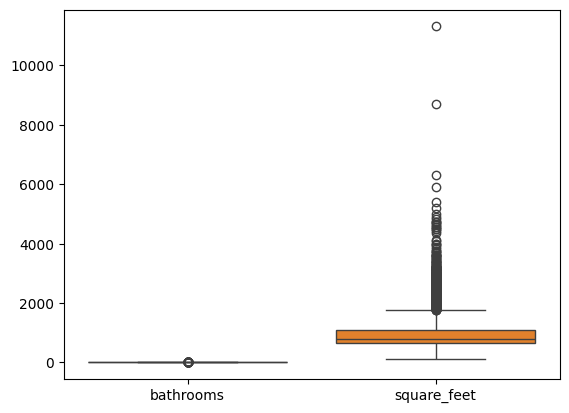

In [90]:
sns.boxplot(outliersdata)

In [91]:
theoutlierindex =detect_outliers_iqr(outliersdata)

In [92]:
theoutlierindex
for key in theoutlierindex.keys() :
    print(f"{key} the len = {len(theoutlierindex[key])}")

bathrooms the len = 63
square_feet the len = 566


In [93]:
Q3 = outliersdata["square_feet"].quantile(0.75)
Q1 = outliersdata["square_feet"].quantile(0.25)

In [94]:
outliersdata.loc[outliersdata["square_feet"] > Q3, "square_feet"] =  Q3
outliersdata.loc[outliersdata["square_feet"] < Q1, "square_feet"] =  Q1

<Axes: >

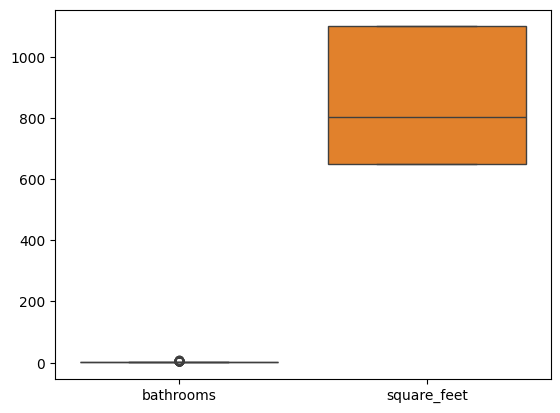

In [95]:
sns.boxplot(outliersdata)

In [96]:
outliersdata_1=outliersdata_1.drop(theoutlierindex['bathrooms'])

<Axes: >

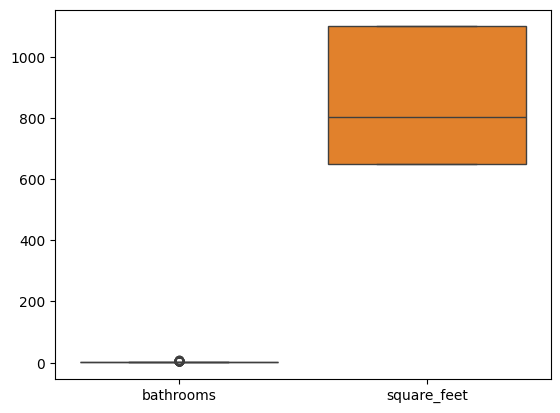

In [97]:
sns.boxplot(outliersdata)

In [98]:
outliersdata_1[numcoll]=outliersdata[numcoll]

In [99]:
outliersdata_1.isna().sum()

index                 0
bathrooms             0
bedrooms              0
has_photo             0
pets_allowed          0
price                 0
square_feet           0
cityname              0
state                 0
latitude              0
longitude             0
source                0
AC                    0
Alarm                 0
Basketball            0
Tennis                0
TV                    0
Luxury                0
Refrigerator          0
Storage               0
Patio/Deck            0
Cable or Satellite    0
View                  0
Gym                   0
Parking               0
Gated                 0
Golf                  0
Garbage Disposal      0
Internet Access       0
Clubhouse             0
Hot Tub               0
Pool                  0
Fireplace             0
Wood Floors           0
Dishwasher            0
Washer Dryer          0
Doorman               0
Playground            0
Elevator              0
dtype: int64

### **Encoding**

In [100]:
encodingdata=outliersdata_1.copy()

In [101]:
for col in encodingdata.columns :
    if encodingdata[col].dtype == "category" :
        encodingdata[col]=encodingdata[col].cat.codes
    

In [102]:
encodingdata.head(10)

index  bathrooms  bedrooms  has_photo  pets_allowed  price  square_feet  \
0      0          2         2          1             1   1194          800   
1      1          1         1          1             1   1370          795   
2      2          1         1          1             1   1009          650   
3      3          1         1          1             1    695          650   
4      4          3         3          1             1   3695         1100   
5      5          2         3          1             1   1750         1100   
6      6          1         2          1             1   2470         1079   
7      7          2         3          1             1   1250         1100   
8      8          1         1          1             1   1789          678   
9      9          1         2          1             1   1225          995   

   cityname  state  latitude  ...  Clubhouse  Hot Tub  Pool  Fireplace  \
0       221     26   35.7585  ...          1        0     1          1   
1       763     47   43.0724  ...          0        0     0          0   
2       481      9   29.6533  ...          0        0     0          0   
3       982     28   41.2562  ...          0        0     0          0   
4       747      4   34.0372  ...          0        0     0          0   
5        77     18   30.4415  ...          0        0     0          0   
6       759     46   47.8616  ...          0        0     1          0   
7      1227     35   35.3537  ...          0        0     0          0   
8       334     42   32.8212  ...          0        0     0          0   
9       453     22   45.2764  ...          0        0     0          0   

   Wood Floors  Dishwasher  Washer Dryer  Doorman  Playground  Elevator  
0            0           0             0        0           1         0  
1            0           1             0        0           0         1  
2            0           1             0        0           0         0  
3            0           0             0        0           0         0  
4            0           0             0        0           0         0  
5            0           0             0        0           0         0  
6            0           0             0        0           0         0  
7            0           0             0        0           0         0  
8            0           0             0        0           0         0  
9            0           1             0        0           1         1  

[10 rows x 39 columns]

### **Duplicates**

In [103]:
df_no_duplicates = encodingdata.drop_duplicates()

In [104]:
encodingdata.head(9000)

index  bathrooms  bedrooms  has_photo  pets_allowed  price  square_feet  \
0         0          2         2          1             1   1194          800   
1         1          1         1          1             1   1370          795   
2         2          1         1          1             1   1009          650   
3         3          1         1          1             1    695          650   
4         4          3         3          1             1   3695         1100   
...     ...        ...       ...        ...           ...    ...          ...   
8893   8995          1         2          1             1   1158          875   
8894   8996          1         1          1             0   2035          824   
8895   8997          1         2          1             1    424          844   
8896   8998          1         2          1             1   1417          650   
8897   8999          2         2          1             1   2398         1066   

      cityname  state  latitude  ...  Clubhouse  Hot Tub  Pool  Fireplace  \
0          221     26   35.7585  ...          1        0     1          1   
1          763     47   43.0724  ...          0        0     0          0   
2          481      9   29.6533  ...          0        0     0          0   
3          982     28   41.2562  ...          0        0     0          0   
4          747      4   34.0372  ...          0        0     0          0   
...        ...    ...       ...  ...        ...      ...   ...        ...   
8893       921      6   41.3498  ...          1        0     1          0   
8894        96     46   47.5988  ...          0        0     0          0   
8895       450     47   43.7815  ...          0        0     0          0   
8896      1042      4   33.9883  ...          1        0     1          0   
8897       413      4   34.1640  ...          0        0     0          0   

      Wood Floors  Dishwasher  Washer Dryer  Doorman  Playground  Elevator  
0               0           0             0        0           1         0  
1               0           1             0        0           0         1  
2               0           1             0        0           0         0  
3               0           0             0        0           0         0  
4               0           0             0        0           0         0  
...           ...         ...           ...      ...         ...       ...  
8893            0           0             0        0           0         0  
8894            0           0             0        0           0         0  
8895            0           0             0        0           0         0  
8896            1           1             0        0           1         0  
8897            0           0             0        0           0         0  

[8835 rows x 39 columns]

### **Normalization** 

In [105]:
norm_data = df_no_duplicates.copy()

In [106]:
scaler = MinMaxScaler(feature_range=(100,1000))
data_array = norm_data["square_feet"].values.reshape(-1, 1)
normalized_data = scaler.fit_transform(data_array)
norm_data["square_feet"] = normalized_data
norm_data.head(20)

index  bathrooms  bedrooms  has_photo  pets_allowed  price  square_feet  \
0       0          2         2          1             1   1194        400.0   
1       1          1         1          1             1   1370        390.0   
2       2          1         1          1             1   1009        100.0   
3       3          1         1          1             1    695        100.0   
4       4          3         3          1             1   3695       1000.0   
5       5          2         3          1             1   1750       1000.0   
6       6          1         2          1             1   2470        958.0   
7       7          2         3          1             1   1250       1000.0   
8       8          1         1          1             1   1789        156.0   
9       9          1         2          1             1   1225        790.0   
10     10          1         2          1             1    715        100.0   
11     11          1         1          1             1    703        268.0   
12     12          1         1          1             1   1035        156.0   
13     13          1         1          1             1   1030        100.0   
14     14          1         2          1             1    563        410.0   
15     15          2         3          1             1   2395       1000.0   
16     16          1         1          1             1   1599        100.0   
17     17          1         1          1             1   1350        368.0   
18     18          1         2          1             1   1600        474.0   
19     19          1         1          1             1    755        100.0   

    cityname  state  latitude  ...  Clubhouse  Hot Tub  Pool  Fireplace  \
0        221     26   35.7585  ...          1        0     1          1   
1        763     47   43.0724  ...          0        0     0          0   
2        481      9   29.6533  ...          0        0     0          0   
3        982     28   41.2562  ...          0        0     0          0   
4        747      4   34.0372  ...          0        0     0          0   
5         77     18   30.4415  ...          0        0     0          0   
6        759     46   47.8616  ...          0        0     1          0   
7       1227     35   35.3537  ...          0        0     0          0   
8        334     42   32.8212  ...          0        0     0          0   
9        453     22   45.2764  ...          0        0     0          0   
10       940     44   36.9141  ...          0        0     0          0   
11       294     15   39.2129  ...          0        0     1          0   
12       334     42   32.9455  ...          0        0     1          0   
13        63     42   30.3054  ...          0        0     1          0   
14      1330     42   33.4632  ...          1        0     1          0   
15       551     36   45.4157  ...          0        0     0          0   
16      1317      9   28.0076  ...          0        0     0          0   
17       268     34   39.1535  ...          0        0     0          0   
18       700     30   40.2659  ...          0        0     1          0   
19      1051     37   40.4448  ...          0        0     0          0   

    Wood Floors  Dishwasher  Washer Dryer  Doorman  Playground  Elevator  
0             0           0             0        0           1         0  
1             0           1             0        0           0         1  
2             0           1             0        0           0         0  
3             0           0             0        0           0         0  
4             0           0             0        0           0         0  
5             0           0             0        0           0         0  
6             0           0             0        0           0         0  
7             0           0             0        0           0         0  
8             0           0             0        0           0         0  
9             0   

In [107]:
scaler = MinMaxScaler(feature_range=(100,1000))
data_array = norm_data["latitude"].values.reshape(-1, 1)
normalized_data = scaler.fit_transform(data_array)
norm_data["latitude"] = normalized_data
norm_data.head(20)

index  bathrooms  bedrooms  has_photo  pets_allowed  price  square_feet  \
0       0          2         2          1             1   1194        400.0   
1       1          1         1          1             1   1370        390.0   
2       2          1         1          1             1   1009        100.0   
3       3          1         1          1             1    695        100.0   
4       4          3         3          1             1   3695       1000.0   
5       5          2         3          1             1   1750       1000.0   
6       6          1         2          1             1   2470        958.0   
7       7          2         3          1             1   1250       1000.0   
8       8          1         1          1             1   1789        156.0   
9       9          1         2          1             1   1225        790.0   
10     10          1         2          1             1    715        100.0   
11     11          1         1          1             1    703        268.0   
12     12          1         1          1             1   1035        156.0   
13     13          1         1          1             1   1030        100.0   
14     14          1         2          1             1    563        410.0   
15     15          2         3          1             1   2395       1000.0   
16     16          1         1          1             1   1599        100.0   
17     17          1         1          1             1   1350        368.0   
18     18          1         2          1             1   1600        474.0   
19     19          1         1          1             1    755        100.0   

    cityname  state    latitude  ...  Clubhouse  Hot Tub  Pool  Fireplace  \
0        221     26  422.720558  ...          1        0     1          1   
1        763     47  586.145462  ...          0        0     0          0   
2        481      9  286.303363  ...          0        0     0          0   
3        982     28  545.563514  ...          0        0     0          0   
4        747      4  384.259096  ...          0        0     0          0   
5         77     18  303.915240  ...          0        0     0          0   
6        759     46  693.157392  ...          0        0     1          0   
7       1227     35  413.675534  ...          0        0     0          0   
8        334     42  357.088273  ...          0        0     0          0   
9        453     22  635.392579  ...          0        0     0          0   
10       940     44  448.541778  ...          0        0     0          0   
11       294     15  499.907146  ...          0        0     1          0   
12       334     42  359.865685  ...          0        0     1          0   
13        63     42  300.874164  ...          0        0     1          0   
14      1330     42  371.433395  ...          1        0     1          0   
15       551     36  638.505158  ...          0        0     0          0   
16      1317      9  249.531139  ...          0        0     0          0   
17       268     34  498.579888  ...          0        0     0          0   
18       700     30  523.435828  ...          0        0     1          0   
19      1051     37  527.433246  ...          0        0     0          0   

    Wood Floors  Dishwasher  Washer Dryer  Doorman  Playground  Elevator  
0             0           0             0        0           1         0  
1             0           1             0        0           0         1  
2             0           1             0        0           0         0  
3             0           0             0        0           0         0  
4             0           0             0        0           0         0  
5             0           0             0        0           0         0  
6             0           0             0        0           0         0  
7             0           0             0        0           0         0  
8             0           0             0        0 

In [108]:
scaler = MinMaxScaler(feature_range=(100,1000))
data_array = norm_data["longitude"].values.reshape(-1, 1)
normalized_data = scaler.fit_transform(data_array)
norm_data["longitude"] = normalized_data
norm_data.head(20)

index  bathrooms  bedrooms  has_photo  pets_allowed  price  square_feet  \
0       0          2         2          1             1   1194        400.0   
1       1          1         1          1             1   1370        390.0   
2       2          1         1          1             1   1009        100.0   
3       3          1         1          1             1    695        100.0   
4       4          3         3          1             1   3695       1000.0   
5       5          2         3          1             1   1750       1000.0   
6       6          1         2          1             1   2470        958.0   
7       7          2         3          1             1   1250       1000.0   
8       8          1         1          1             1   1789        156.0   
9       9          1         2          1             1   1225        790.0   
10     10          1         2          1             1    715        100.0   
11     11          1         1          1             1    703        268.0   
12     12          1         1          1             1   1035        156.0   
13     13          1         1          1             1   1030        100.0   
14     14          1         2          1             1    563        410.0   
15     15          2         3          1             1   2395       1000.0   
16     16          1         1          1             1   1599        100.0   
17     17          1         1          1             1   1350        368.0   
18     18          1         2          1             1   1600        474.0   
19     19          1         1          1             1    755        100.0   

    cityname  state    latitude  ...  Clubhouse  Hot Tub  Pool  Fireplace  \
0        221     26  422.720558  ...          1        0     1          1   
1        763     47  586.145462  ...          0        0     0          0   
2        481      9  286.303363  ...          0        0     0          0   
3        982     28  545.563514  ...          0        0     0          0   
4        747      4  384.259096  ...          0        0     0          0   
5         77     18  303.915240  ...          0        0     0          0   
6        759     46  693.157392  ...          0        0     1          0   
7       1227     35  413.675534  ...          0        0     0          0   
8        334     42  357.088273  ...          0        0     0          0   
9        453     22  635.392579  ...          0        0     0          0   
10       940     44  448.541778  ...          0        0     0          0   
11       294     15  499.907146  ...          0        0     1          0   
12       334     42  359.865685  ...          0        0     1          0   
13        63     42  300.874164  ...          0        0     1          0   
14      1330     42  371.433395  ...          1        0     1          0   
15       551     36  638.505158  ...          0        0     0          0   
16      1317      9  249.531139  ...          0        0     0          0   
17       268     34  498.579888  ...          0        0     0          0   
18       700     30  523.435828  ...          0        0     1          0   
19      1051     37  527.433246  ...          0        0     0          0   

    Wood Floors  Dishwasher  Washer Dryer  Doorman  Playground  Elevator  
0             0           0             0        0           1         0  
1             0           1             0        0           0         1  
2             0           1             0        0           0         0  
3             0           0             0        0           0         0  
4             0           0             0        0           0         0  
5             0           0             0        0           0         0  
6             0           0             0        0           0         0  
7             0           0             0        0           0         0  
8             0           0             0        0 

In [109]:
phaseTwo_data=norm_data.copy()

In [110]:
phaseTwo_data.describe()

index    bathrooms     bedrooms    has_photo  pets_allowed  \
count  8835.000000  8835.000000  8835.000000  8835.000000   8835.000000   
mean   4495.960385     1.325976     1.726882     0.982117      0.964007   
std    2597.933465     0.519180     0.908041     0.132535      0.244142   
min       0.000000     1.000000     0.000000     0.000000      0.000000   
25%    2249.500000     1.000000     1.000000     1.000000      1.000000   
50%    4488.000000     1.000000     2.000000     1.000000      1.000000   
75%    6742.500000     2.000000     2.000000     1.000000      1.000000   
max    8999.000000     3.000000     7.000000     1.000000      2.000000   

              price  square_feet     cityname        state     latitude  ...  \
count   8835.000000  8835.000000  8835.000000  8835.000000  8835.000000  ...   
mean    1463.908319   501.605886   687.049689    25.876740   465.406843  ...   
std      999.888181   366.255107   431.834163    14.963569   123.731775  ...   
min      200.000000   100.000000     0.000000     0.000000   100.000000  ...   
25%      949.000000   100.000000   294.000000    12.000000   374.595131  ...   
50%     1270.000000   400.000000   696.000000    26.000000   487.300421  ...   
75%     1690.000000   995.000000  1074.000000    42.000000   548.127537  ...   
max    52500.000000  1000.000000  1496.000000    49.000000  1000.000000  ...   

         Clubhouse      Hot Tub         Pool    Fireplace  Wood Floors  \
count  8835.000000  8835.000000  8835.000000  8835.000000  8835.000000   
mean      0.134126     0.034975     0.328580     0.109677     0.036220   
std       0.340807     0.183726     0.469723     0.312505     0.186847   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     1.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        Dishwasher  Washer Dryer      Doorman   Playground     Elevator  
count  8835.000000   8835.000000  8835.000000  8835.000000  8835.000000  
mean      0.329259      0.108659     0.002830     0.078664     0.064629  
std       0.469971      0.311228     0.053122     0.269229     0.245885  
min       0.000000      0.000000     0.000000     0.000000     0.000000  
25%       0.000000      0.000000     0.000000     0.000000     0.000000  
50%       0.000000      0.000000     0.000000     0.000000     0.000000  
75%       1.000000      0.000000     0.000000     0.000000     0.000000  
max       1.000000      1.000000     1.000000     1.000000     1.000000  

[8 rows x 39 columns]

In [111]:
phaseTwo_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8835 entries, 0 to 8897
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               8835 non-null   int64  
 1   bathrooms           8835 non-null   int32  
 2   bedrooms            8835 non-null   int32  
 3   has_photo           8835 non-null   int8   
 4   pets_allowed        8835 non-null   int8   
 5   price               8835 non-null   int64  
 6   square_feet         8835 non-null   float64
 7   cityname            8835 non-null   int16  
 8   state               8835 non-null   int8   
 9   latitude            8835 non-null   float64
 10  longitude           8835 non-null   float64
 11  source              8835 non-null   int8   
 12  AC                  8835 non-null   int32  
 13  Alarm               8835 non-null   int32  
 14  Basketball          8835 non-null   int32  
 15  Tennis              8835 non-null   int32  
 16  TV         

In [112]:
phaseTwo_data.isna().sum()

index                 0
bathrooms             0
bedrooms              0
has_photo             0
pets_allowed          0
price                 0
square_feet           0
cityname              0
state                 0
latitude              0
longitude             0
source                0
AC                    0
Alarm                 0
Basketball            0
Tennis                0
TV                    0
Luxury                0
Refrigerator          0
Storage               0
Patio/Deck            0
Cable or Satellite    0
View                  0
Gym                   0
Parking               0
Gated                 0
Golf                  0
Garbage Disposal      0
Internet Access       0
Clubhouse             0
Hot Tub               0
Pool                  0
Fireplace             0
Wood Floors           0
Dishwasher            0
Washer Dryer          0
Doorman               0
Playground            0
Elevator              0
dtype: int64

## **Phase Three**